### ANÁLISIS EXPLORATORIO DE DATOS (E.D.A.) 
DATA 07 - Martín Giribone

In [144]:
#Importo librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [145]:
#importamos nuestros csv
data_score = pd.read_csv('./Datasets/score_movies.csv')
data_plataformas = pd.read_csv('./detaAPI/plataformas_completo.csv')

In [146]:
#Visualizo ambos datasets
data_score.head()

,userId,score,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186
2,1,5.0,2015-03-09,hs2381
3,1,5.0,2015-03-09,ns3663
4,1,5.0,2015-03-09,as9500


In [147]:
data_plataformas.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ID,duration_int,duration_type,platform,score
0,0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,3.467131
1,1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,min,amazon,3.548682
2,2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,min,amazon,3.500000
3,3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,69,min,amazon,3.538055
4,4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,min,amazon,3.478992


In [148]:
#Elimino la columna 'Unnamed: 0'
data_plataformas.drop(columns=['Unnamed: 0'], inplace=True)


In [149]:
#Cambio el nomre de la columna 'listed_in' por 'gender'
data_plataformas = data_plataformas.rename(columns={'listed_in': 'gender'})

In [150]:
data_plataformas.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,gender,description,ID,duration_int,duration_type,platform,score
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,3.467131
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,min,amazon,3.548682
2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,min,amazon,3.500000
3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,69,min,amazon,3.538055
4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,min,amazon,3.478992


### Dataset score

In [151]:
data_score.shape

(11013823, 4)

In [152]:
#Usuarios unicos
print(f"Hay {len(data_score['userId'].unique())} usuarios unicos")

Hay 115077 usuarios unicos


In [153]:
#Veo el tipo de dato del dataset
data_score.dtypes

userId         int64
score        float64
timestamp     object
movieId       object
dtype: object

Veo los  valores duplicados

In [154]:
print(f"Hay {data_score.duplicated().sum()} valores duplicados")

Hay 0 valores duplicados


In [155]:
#Los elimino 
data_score.drop_duplicates(inplace=True)

In [156]:
#Reviso
print(f"Hay {data_score.duplicated().sum()} valores duplicados")

Hay 0 valores duplicados


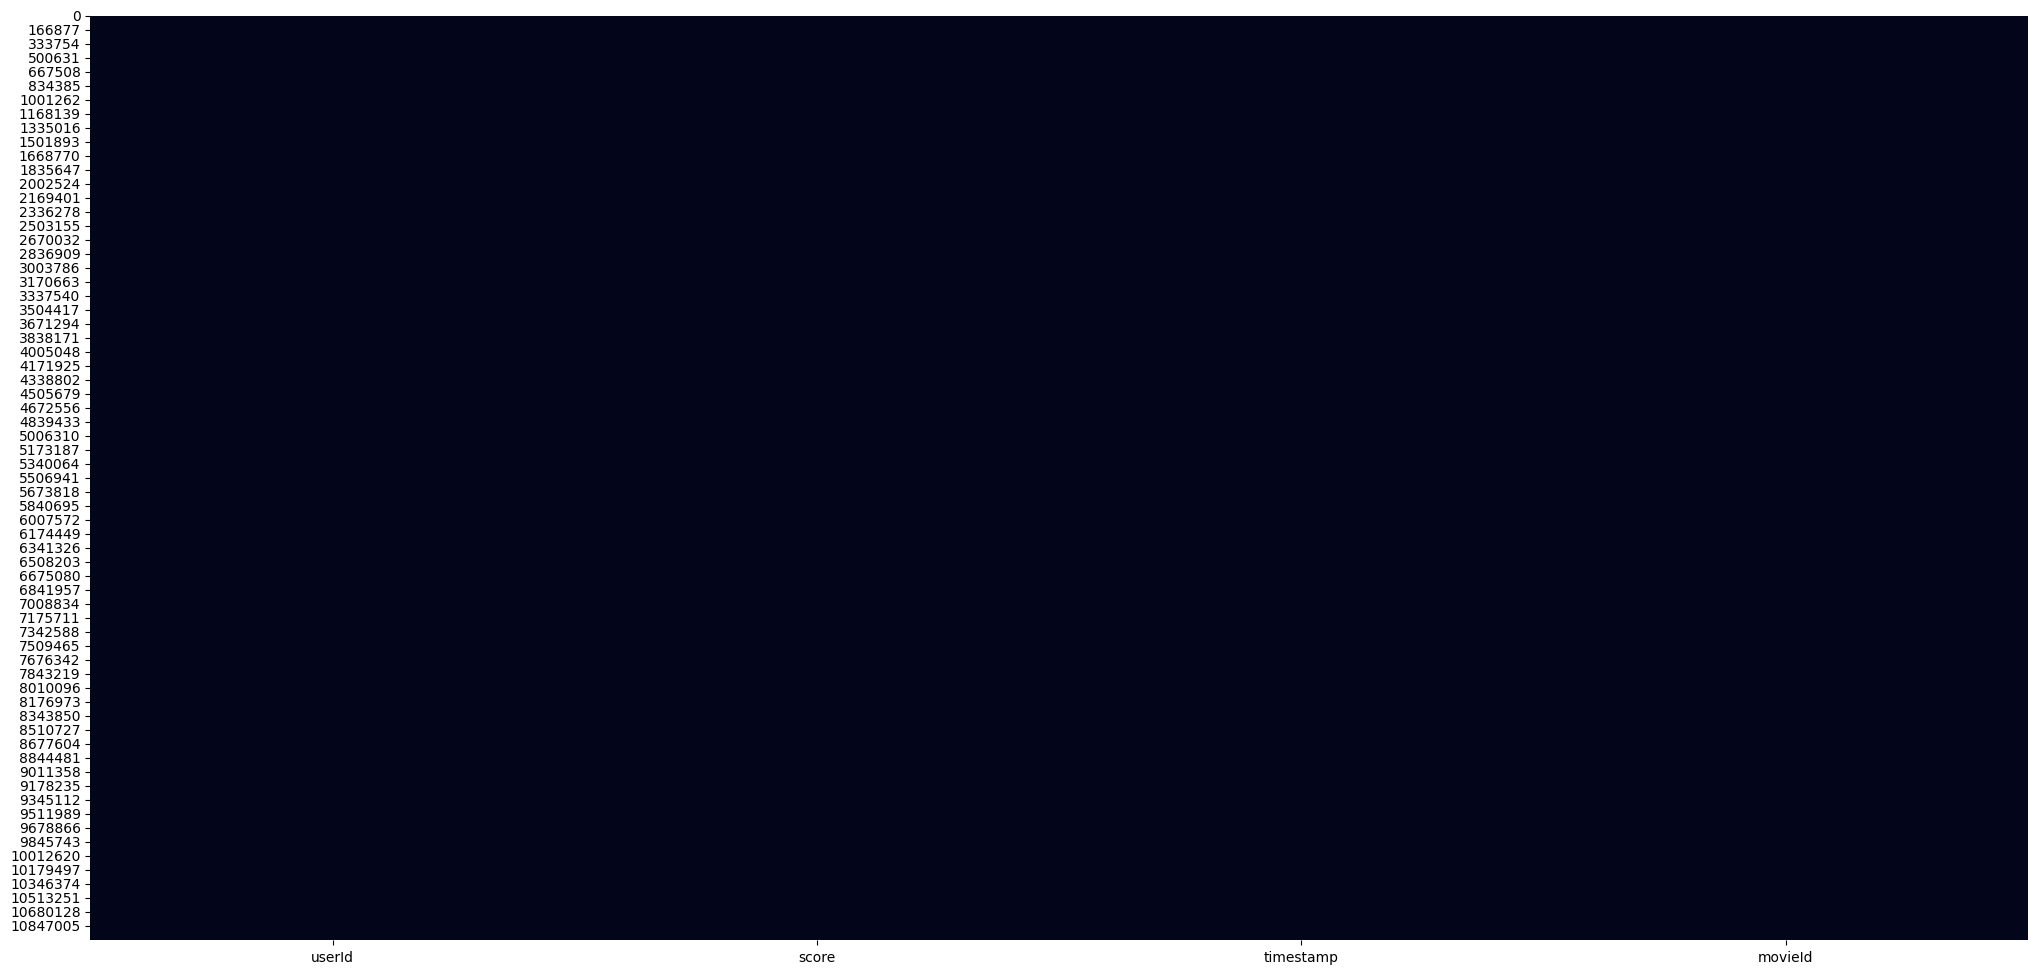

In [157]:
#Visualizo los datos faltantes con una matrix a través de seaborn
plt.figure(figsize= (25,12))
sns.heatmap(data_score.isnull(), cbar=False)
plt.show()


In [158]:
#Compruebo que no hay valores faltantes
data_score.isnull().sum().sort_values(ascending=False)

userId       0
score        0
timestamp    0
movieId      0
dtype: int64

In [159]:
#Guardo el dataset
data_score.to_csv('score_movies.csv', index=False)

### Dataset plataformas

In [160]:
#Veo la cantidad de filas y columnas de nuestro dataset
data_plataformas.shape

(22998, 17)

In [161]:
#Veo los duplicados
data_plataformas[data_plataformas.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,gender,description,ID,duration_int,duration_type,platform,score


In [162]:
#No se econtraron duplicados
data_plataformas.duplicated().sum()

0

Visualizo los valores nulos

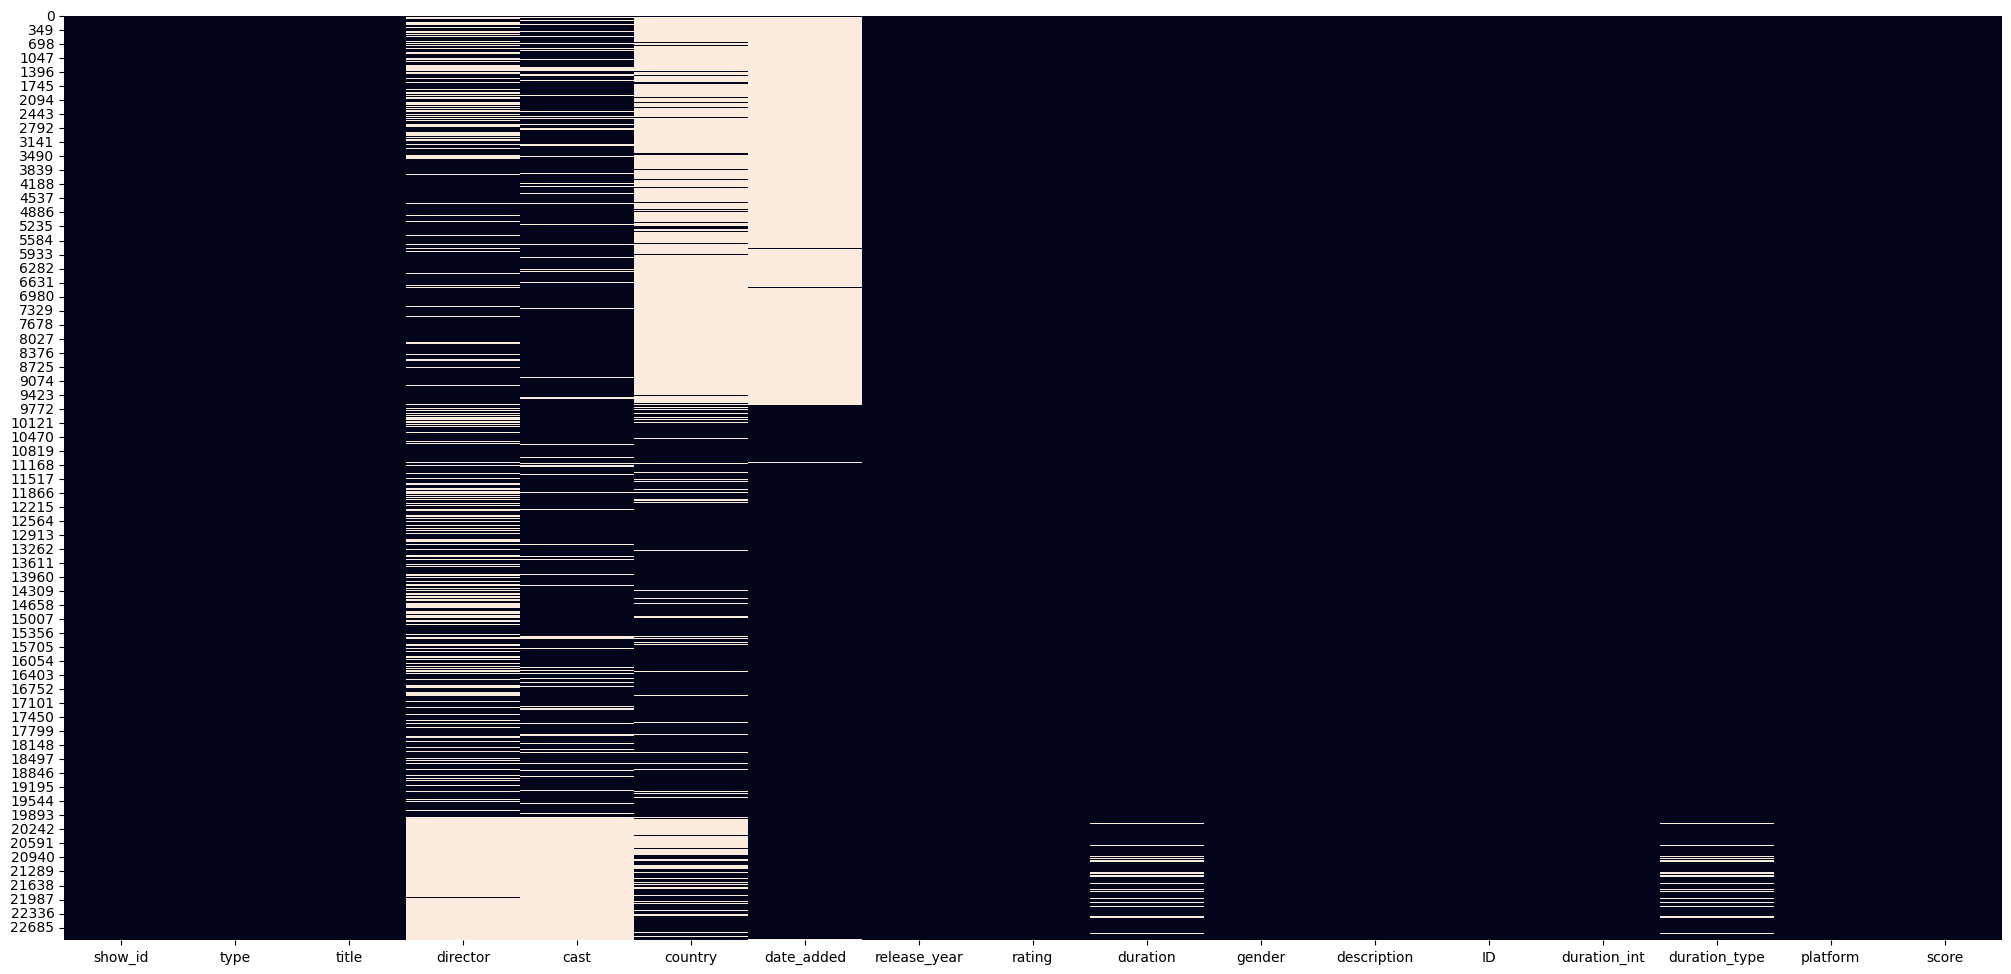

In [163]:
plt.figure(figsize= (25,12))
sns.heatmap(data_plataformas.isnull(), cbar=False)
plt.show()

In [164]:
#Vamos a ver la cantidad de nulos por columna asi los cuantificamos
data_plataformas.isnull().sum().sort_values(ascending=False)

country          11499
date_added        9554
director          8259
cast              5321
duration_type      482
duration           482
show_id              0
description          0
platform             0
duration_int         0
ID                   0
rating               0
gender               0
type                 0
release_year         0
title                0
score                0
dtype: int64

Analizamos la columna 'country', que la matriz y el codigo nos indicaron que tiene una gran cantidad de datos faltantes

In [165]:
print('Porcentaje de valores faltantes de la variable country:', (data_plataformas.country.isnull().sum()/len(data_plataformas)) * 100)

Porcentaje de valores faltantes de la variable country: 50.0


In [166]:
#Visualizo sus valores
data_plataformas.country.value_counts()

united states                               4997
india                                       1203
united kingdom                               583
japan                                        515
canada                                       237
                                            ... 
united states, norway, canada                  1
kenya, united states                           1
taiwan, malaysia                               1
uruguay, argentina, germany, spain             1
united kingdom, france, germany, ireland       1
Name: country, Length: 886, dtype: int64

In [167]:
#Opto por dropearla, dado que tiene la mitad de los datos faltantes y no es una columna que me va a dar infomración para el modelo
data_plataformas.drop(columns='country', inplace=True)

In [168]:
#Verifico
data_plataformas.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,gender,description,ID,duration_int,duration_type,platform,score
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,3.467131
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,min,amazon,3.548682
2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,min,amazon,3.500000
3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",2021-03-30,2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,69,min,amazon,3.538055
4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",2021-03-30,1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,min,amazon,3.478992


Analizo la columna 'date_added'

In [169]:
print('Porcentaje de valores faltantes de la variable date_added:', (data_plataformas.date_added.isnull().sum()/len(data_plataformas)) * 100)

Porcentaje de valores faltantes de la variable date_added: 41.5427428472041


In [170]:
#Decido por dropear esta columna, dado que tiene gran cantidad de datos faltantes y no me va aportar información para el modelo
data_plataformas.drop(columns='date_added', inplace=True)

In [171]:
#Verifico
data_plataformas.head()

,show_id,type,title,director,cast,release_year,rating,duration,gender,description,ID,duration_int,duration_type,platform,score
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,3.467131
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,min,amazon,3.548682
2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,min,amazon,3.500000
3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,69,min,amazon,3.538055
4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,min,amazon,3.478992


Analizo la columna 'director'

In [172]:
print('Porcentaje de valores faltantes de la variable director:', (data_plataformas.director.isnull().sum()/len(data_plataformas)) * 100)

Porcentaje de valores faltantes de la variable director: 35.91181841899296


In [173]:
#Visualizo sus valores
data_plataformas.director.value_counts()

mark knight                                                                                                                                                                 113
cannis holder                                                                                                                                                                61
jay chapman                                                                                                                                                                  46
moonbug entertainment                                                                                                                                                        37
arthur van merwijk                                                                                                                                                           30
                                                                                                                        

Eliminar esta columna seria borrar informacion valiosa

In [174]:
#Voy a colocar ND (No Director) donde tenga valores faltantes
data_plataformas.director.replace(np.nan, 'ND', inplace = True)

In [175]:
#Verifico
data_plataformas.head()

,show_id,type,title,director,cast,release_year,rating,duration,gender,description,ID,duration_int,duration_type,platform,score
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,3.467131
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,min,amazon,3.548682
2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,min,amazon,3.500000
3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,69,min,amazon,3.538055
4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,min,amazon,3.478992


Analizo la columna 'cast'

In [176]:
print('Porcentaje de valores faltantes de la variable cast:', (data_plataformas.cast.isnull().sum()/len(data_plataformas)) * 100)

Porcentaje de valores faltantes de la variable cast: 23.1367945038699


In [177]:
#Visualizo sus valores
data_plataformas.cast.value_counts()

maggie binkley                                                                                                                           56
1                                                                                                                                        34
anne-marie newland                                                                                                                       24
david attenborough                                                                                                                       22
cassandra peterson                                                                                                                       21
                                                                                                                                         ..
mohanlal, gautami, viswant duddumpudi, anisha ambrose, p. balachandran, joy mathew, raina rao                                             1
charl washington, co

In [178]:
#Voy a colocar NC (No Cast) donde tenga valores faltantes
data_plataformas.cast.replace(np.nan, 'NC', inplace = True)

In [179]:
#Visualizo
data_plataformas.head()

,show_id,type,title,director,cast,release_year,rating,duration,gender,description,ID,duration_int,duration_type,platform,score
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,3.467131
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,min,amazon,3.548682
2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,min,amazon,3.500000
3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,69,min,amazon,3.538055
4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,min,amazon,3.478992


Analizo la columna 'duration_type'

In [180]:
print('Porcentaje de valores faltantes de la variable duration_type	:', (data_plataformas.duration_type.isnull().sum()/len(data_plataformas)) * 100)

Porcentaje de valores faltantes de la variable duration_type	: 2.0958344203843815


In [181]:
#Visualizo sus valores
data_plataformas.duration_type.value_counts()

min       15999
season     6517
Name: duration_type, dtype: int64

La cantidad de valores faltantes es muy baja

In [182]:
#Veo la columna "type"
data_plataformas.type.value_counts()

movie      16481
tv show     6517
Name: type, dtype: int64

Visualizo que los datos faltantes en 'duration_type' corresponden al tipo movie

In [183]:
#relleno los datos con min
data_plataformas.fillna(value='min', inplace=True)

In [184]:
#Verifico
data_plataformas.duration_type.value_counts()

min       16481
season     6517
Name: duration_type, dtype: int64

Analizo la columna 'duration'

In [185]:
print('Porcentaje de valores faltantes de la variable duration	:', (data_plataformas.duration.isnull().sum()/len(data_plataformas)) * 100)

Porcentaje de valores faltantes de la variable duration	: 0.0


In [186]:
data_plataformas.duration_int.value_counts()

1      4194
2      1016
0       492
3       487
90      429
       ... 
601       1
479       1
485       1
550       1
201       1
Name: duration_int, Length: 225, dtype: int64

Voy a imputarlos con el valor 0

In [187]:
#importo libreria y el modulo que voy a usar
from sklearn.impute import SimpleImputer


In [188]:
#Defino la estrategia
imputer = SimpleImputer(strategy='constant', fill_value=0)

In [189]:
#Entreno
imputer.fit(data_plataformas[['duration_int']])

data_plataformas['duration_int'] = imputer.transform(data_plataformas[['duration_int']])

In [190]:
#Visualizo
data_plataformas.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
release_year     0
rating           0
duration         0
gender           0
description      0
ID               0
duration_int     0
duration_type    0
platform         0
score            0
dtype: int64

## Conclusiones

* Luego de la limpieza de datos, llega el momento de tomar deciciones pensando en nuestro modelo de recomendación. En primer lugar voy a decidir dropear las columnas que no me aporten información para la realización del modelo, esto dado que mirando a simple viste, no hay relaciones entre las columnas que se eliminaran con las del dataset que contienen el score de las peliculaa, por esto me puedo tomar la libertad de sacarlas del dataset porque no presentan tal relación. Siendo asi que me quedo con las columnas ´title´, ´gender´ y ´ID´

* Luego de la supresión de las columnas, voy a renombrar la columna 'ID' por 'movieId' asi posteriormente puedo juntar los dos datasets.


In [191]:
data_plataformas.head()

,show_id,type,title,director,cast,release_year,rating,duration,gender,description,ID,duration_int,duration_type,platform,score
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,3.467131
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,min,amazon,3.548682
2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,min,amazon,3.500000
3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,69,min,amazon,3.538055
4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,min,amazon,3.478992


In [192]:
data_score.head()

,userId,score,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186
2,1,5.0,2015-03-09,hs2381
3,1,5.0,2015-03-09,ns3663
4,1,5.0,2015-03-09,as9500


In [193]:
#A fines practicos voy a cambiar el nombre de la columna ID por movieId
data_plataformas = data_plataformas.rename(columns={'ID': 'movieId'})

In [194]:
#Voy a dropear las columnas que no me aportan información para el modelo y luego uno los dos datasets
data_plataformas.drop(columns='show_id' , inplace=True)
data_plataformas.drop(columns='type' , inplace=True)
data_plataformas.drop(columns='director' , inplace=True)
data_plataformas.drop(columns='cast' , inplace=True)
data_plataformas.drop(columns='release_year' , inplace=True)
data_plataformas.drop(columns='rating' , inplace=True)
data_plataformas.drop(columns='duration' , inplace=True)
data_plataformas.drop(columns='description' , inplace=True)
data_plataformas.drop(columns='duration_int' , inplace=True)
data_plataformas.drop(columns='duration_type' , inplace=True)
data_plataformas.drop(columns='score' , inplace=True)


In [195]:
#Guardo el dataset
data_plataformas.to_csv('plataformas.csv', index=False)